In [67]:
from django.shortcuts import render
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [68]:

diabetes = pd.read_csv(r"C:\Users\omarw\Downloads\Telegram Desktop\diabetes.csv")
diabetes.head()



,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [69]:
print ("dimmesion of diabetes data : {}".format (diabetes.shape))

dimmesion of diabetes data : (768, 9)


In [70]:
print (diabetes.groupby('Outcome').size())

Outcome
0    500
1    268
dtype: int64


<Axes: xlabel='Outcome', ylabel='count'>

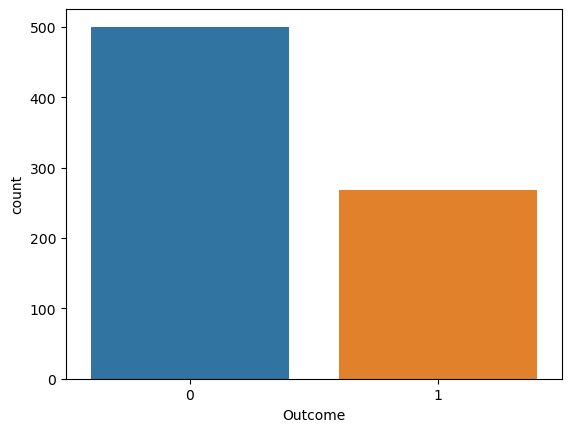

In [138]:
import seaborn as sns

# Assuming 'diabetes' DataFrame and 'Outcome' column are defined
sns.countplot(x='Outcome', data=diabetes, label="count")


In [72]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


# k_Nearst Neighbors


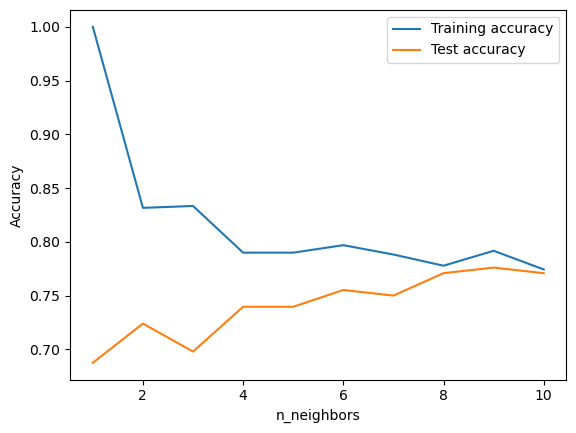

In [73]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

# Assuming 'data' is your dataset
X_train, X_test, y_train, y_test = train_test_split(diabetes.loc[:, diabetes.columns != 'Outcome'],
                                                    diabetes['Outcome'], 
                                                    stratify=diabetes['Outcome'], 
                                                    random_state=66)

training_accuracy = []
test_accuracy = []
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    # Build the model
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    
    # Record training set accuracy
    training_accuracy.append(knn.score(X_train, y_train))
    
    # Record test set accuracy
    test_accuracy.append(knn.score(X_test, y_test))

# Plotting
plt.plot(neighbors_settings, training_accuracy, label="Training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="Test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.savefig('knn_compare_model.png')  # Save the plot as an image
plt.show()  # Show the plot


In [139]:
    knn = KNeighborsClassifier(n_neighbors=9)
    knn.fit(X_train, y_train)

    # Printing accuracy on the training set
    print('Accuracy of K-NN classifier on training set: {:.2f}'.format(knn.score(X_train, y_train)))

    # Printing accuracy on the test set
    print('Accuracy of K-NN classifier on test set: {:.2f}'.format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.79
Accuracy of K-NN classifier on test set: 0.78


# Logistic Regression

In [141]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression().fit(X_train, y_train) #c=1
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train))) 
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))

Training set score: 0.781
Test set score: 0.766


C:\Users\omarw\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [142]:
#Using C=0.01 results in lower accuracy on both the training and the test sets.
logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)

# Printing training set accuracy
print("Training set accuracy: {:.3f}".format(logreg001.score(X_train, y_train)))

# Printing test set accuracy
print("Test set accuracy: {:.3f}".format(logreg001.score(X_test, y_test)))

Training set accuracy: 0.762
Test set accuracy: 0.760


C:\Users\omarw\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [143]:
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)

# Printing training set accuracy
print("Training set accuracy: {:.3f}".format(logreg001.score(X_train, y_train)))

# Printing test set accuracy
print("Test set accuracy: {:.3f}".format(logreg001.score(X_test, y_test)))

Training set accuracy: 0.762
Test set accuracy: 0.760


C:\Users\omarw\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


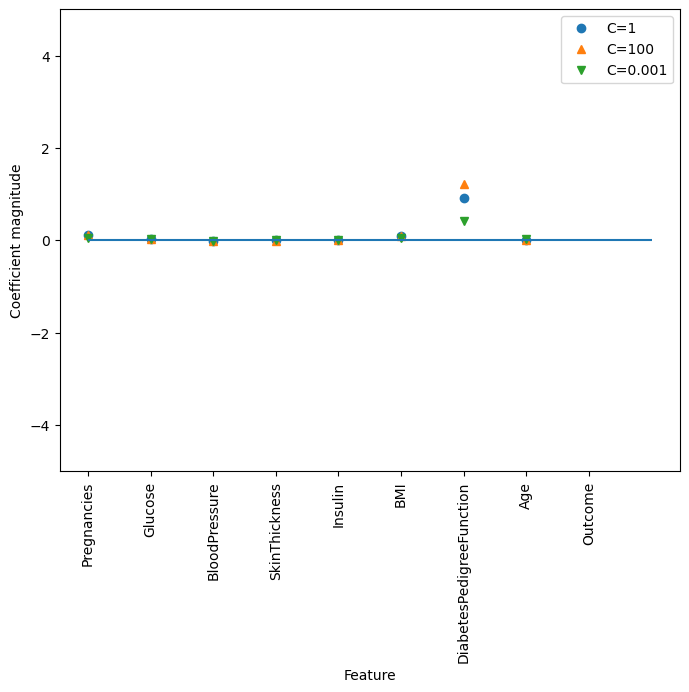

In [78]:
diabetes_features = [x for i, x in enumerate(diabetes.columns) if i != 9]

plt.figure(figsize=(8, 6))

plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg001.coef_.T, 'v', label="C=0.001")
plt.xticks(range(diabetes.shape[1]), diabetes_features, rotation=90)
plt.hlines(0, 0, diabetes.shape[1])
plt.ylim(-5, 5)
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")  # Fixed capitalization error in ylabel
plt.legend()
plt.savefig('log_coef.png')  # Fixed typo in the filename
plt.show()  # Added to display the plot


# Decision tree

In [144]:
from sklearn.tree import DecisionTreeClassifier

# Creating and fitting the Decision Tree classifier
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)

# Printing accuracy on the training set
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))

# Printing accuracy on the test set
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))


Accuracy on training set: 1.000
Accuracy on test set: 0.714


In [80]:
# Creating and fitting the Decision Tree classifier
tree = DecisionTreeClassifier(max_depth=3,random_state=0)
tree.fit(X_train, y_train)

# Printing accuracy on the training set
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))

# Printing accuracy on the test set
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))


Accuracy on training set: 0.773
Accuracy on test set: 0.740


# Feature Importance in Decion Tree

In [148]:
print("Feature importance:\n{}".format(tree.feature_importances_))


Feature importance:
[0.05477652 0.28215943 0.08796796 0.05542765 0.07278587 0.20684233
 0.12670183 0.1133384 ]


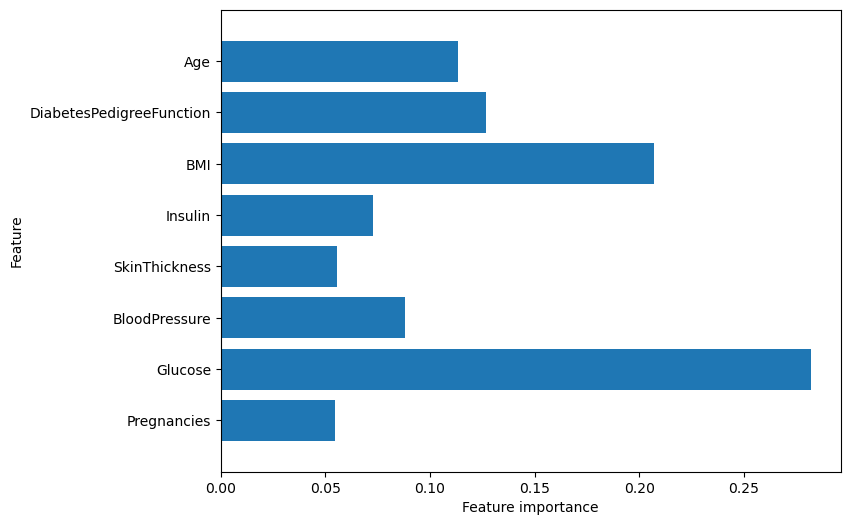

In [149]:
def plot_feature_importances_diabetes(model, feature_names):
    plt.figure(figsize=(8, 6))
    
    n_features = min(len(feature_names), len(model.feature_importances_))  # Choose the minimum length
    
    plt.barh(range(n_features), model.feature_importances_[:n_features], align='center')
    plt.yticks(np.arange(n_features), feature_names[:n_features])  # Use the provided feature_names
    
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
    
    plt.savefig('feature_importance.png')

# Assuming 'diabetes_features' is defined somewhere else
plot_feature_importances_diabetes(tree, diabetes_features)


# Random Forset

In [150]:
from sklearn.ensemble import RandomForestClassifier

# Creating and fitting the Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=0)#n_estimators=100 is num of تفرع الشجرات التابع لها 
rf.fit(X_train, y_train)

# Printing accuracy on the training set
print("Accuracy on training set: {:.3f}".format(rf.score(X_train, y_train)))

# Printing accuracy on the test set
print("Accuracy on test set: {:.3f}".format(rf.score(X_test, y_test)))


Accuracy on training set: 1.000
Accuracy on test set: 0.786


In [108]:
# Creating and fitting the Random Forest classifier
rf = RandomForestClassifier(max_depth=3,n_estimators=100, random_state=0)#make the depth of tree is only 3
rf.fit(X_train, y_train)

# Printing accuracy on the training set
print("Accuracy on training set: {:.3f}".format(rf.score(X_train, y_train)))

# Printing accuracy on the test set
print("Accuracy on test set: {:.3f}".format(rf.score(X_test, y_test)))


Accuracy on training set: 0.800
Accuracy on test set: 0.755


# Feature Importance in RF

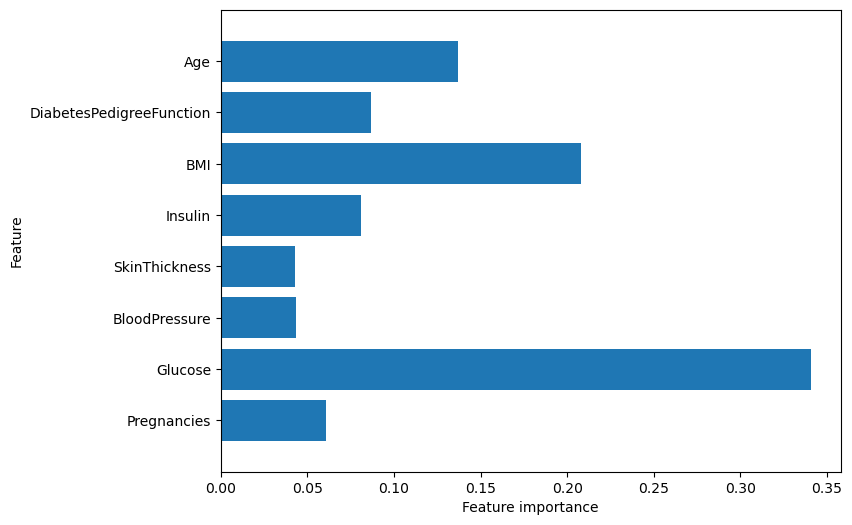

In [123]:

# Assuming 'diabetes_features' is defined somewhere else
plot_feature_importances_diabetes(rf, diabetes_features)


# Gradient Bossting

In [151]:
from sklearn.ensemble import GradientBoostingClassifier

# Creating and fitting the Gradient Boosting classifier
gb = GradientBoostingClassifier(random_state=0)
gb.fit(X_train, y_train)

# Printing accuracy on the training set
print("Accuracy on training set: {:.3f}".format(gb.score(X_train, y_train)))

# Printing accuracy on the test set
print("Accuracy on test set: {:.3f}".format(gb.score(X_test, y_test)))


Accuracy on training set: 0.917
Accuracy on test set: 0.792


In [152]:
from sklearn.ensemble import GradientBoostingClassifier

# Creating and fitting the Gradient Boosting classifier with max_depth=1
gb1 = GradientBoostingClassifier(random_state=0, max_depth=1)
gb1.fit(X_train, y_train)

# Printing accuracy on the training set
print("Accuracy on training set: {:.3f}".format(gb1.score(X_train, y_train)))

# Printing accuracy on the test set
print("Accuracy on test set: {:.3f}".format(gb1.score(X_test, y_test)))


Accuracy on training set: 0.804
Accuracy on test set: 0.781


In [153]:
from sklearn.ensemble import GradientBoostingClassifier

# Creating and fitting the Gradient Boosting classifier with learning_rate=0.01
gb2 = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gb2.fit(X_train, y_train)

# Printing accuracy on the training set
print("Accuracy on training set: {:.3f}".format(gb2.score(X_train, y_train)))

# Printing accuracy on the test set
print("Accuracy on test set: {:.3f}".format(gb2.score(X_test, y_test)))


Accuracy on training set: 0.802
Accuracy on test set: 0.776


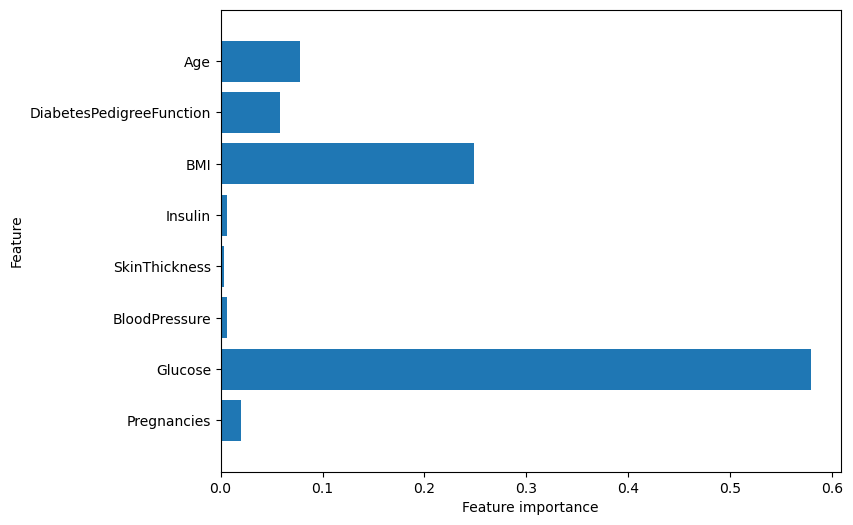

In [126]:
# Assuming 'diabetes_features' is defined somewhere else
plot_feature_importances_diabetes(gb1, diabetes_features)


# support Vector Machine

In [155]:
from sklearn.svm import SVC

# Creating and fitting the Support Vector Classifier
svc = SVC()
svc.fit(X_train, y_train)

# Printing accuracy on the training set
print("Accuracy on training set: {:.2f}".format(svc.score(X_train, y_train)))

# Printing accuracy on the test set
print("Accuracy on test set: {:.2f}".format(svc.score(X_test, y_test)))


Accuracy on training set: 0.77
Accuracy on test set: 0.76


In [156]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC

# Create and fit the scaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and fit the Support Vector Classifier
svc = SVC()
svc.fit(X_train_scaled, y_train)

# Printing accuracy on the training set
print("Accuracy on training set: {:.2f}".format(svc.score(X_train_scaled, y_train)))

# Printing accuracy on the test set
print("Accuracy on test set: {:.2f}".format(svc.score(X_test_scaled, y_test)))


Accuracy on training set: 0.79
Accuracy on test set: 0.79


In [157]:
svc = SVC(C=100)
svc.fit(X_train_scaled, y_train)
print("Accuracy on training set:{:.3f}".format(svc.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(svc.score(X_test_scaled, y_test)))

Accuracy on training set:0.891
Accuracy on test set: 0.760


In [134]:
svc = SVC(C=1000)
svc.fit(X_train_scaled, y_train)
print("Accuracy on training set:{:.3f}".format(svc.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(svc.score(X_test_scaled, y_test)))

Accuracy on training set:0.944
Accuracy on test set: 0.719


In [162]:
svc = SVC(C=70)
svc.fit(X_train_scaled, y_train)
print("Accuracy on training set:{:.3f}".format(svc.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(svc.score(X_test_scaled, y_test)))

Accuracy on training set:0.872
Accuracy on test set: 0.786
